# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [70]:
# Create a base url
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Counters
city_counter = 1
set_counter = 1

print("Begin Data Retrieval")
print("------------------------")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # API url for each city
    query_url = url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase counter
    city_counter += 1
    
   # Add the values
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found! SKIPPNIG! ")
        pass
        
print("------------------------")        
print("Completed")

Begin Data Retrieval
------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | safaga
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | brae
Processing Record 5 of Set 1 | mys shmidta
City not found! SKIPPNIG! 
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kefamenanu
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | progreso
Processing Record 12 of Set 1 | tsihombe
City not found! SKIPPNIG! 
Processing Record 13 of Set 1 | kununurra
Processing Record 14 of Set 1 | barentsburg
City not found! SKIPPNIG! 
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | gunjur
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | tual
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | vidalia
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | co

Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | riverton
Processing Record 44 of Set 4 | chiredzi
Processing Record 45 of Set 4 | aykhal
Processing Record 46 of Set 4 | dhidhdhoo
Processing Record 47 of Set 4 | illoqqortoormiut
City not found! SKIPPNIG! 
Processing Record 48 of Set 4 | gold coast
Processing Record 49 of Set 4 | lorengau
Processing Record 50 of Set 4 | port hedland
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | scottsboro
Processing Record 3 of Set 5 | vulcan
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | kampot
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | biak
Processing Record 8 of Set 5 | colares
Processing Record 9 of Set 5 | kaitangata
Processing Record 10 of Set 5 | richards bay
Processing Record 11 of Set 5 | bikaner
Processing Record 12 of Set 5 | kilindoni
Processing Record 13 of Set 5 | port blair
Processing Record 14 

Processing Record 29 of Set 8 | el alto
Processing Record 30 of Set 8 | republic
Processing Record 31 of Set 8 | waingapu
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | paradwip
City not found! SKIPPNIG! 
Processing Record 34 of Set 8 | haywards heath
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | skara
Processing Record 37 of Set 8 | panjab
Processing Record 38 of Set 8 | el faiyum
City not found! SKIPPNIG! 
Processing Record 39 of Set 8 | porto novo
Processing Record 40 of Set 8 | bolitoc
Processing Record 41 of Set 8 | kaseda
Processing Record 42 of Set 8 | mbandaka
Processing Record 43 of Set 8 | lierneux
Processing Record 44 of Set 8 | devils lake
Processing Record 45 of Set 8 | naze
Processing Record 46 of Set 8 | whitehorse
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | attawapiskat
City not found! SKIPPNIG! 
Processing Record 49 of Set 8 | raudeberg
Processing Record 50 of Set 8 | ashland
Processing Reco

Processing Record 19 of Set 12 | samana
Processing Record 20 of Set 12 | montes altos
Processing Record 21 of Set 12 | katobu
Processing Record 22 of Set 12 | te anau
Processing Record 23 of Set 12 | birao
Processing Record 24 of Set 12 | jachymov
Processing Record 25 of Set 12 | shimoda
Processing Record 26 of Set 12 | qandahar
City not found! SKIPPNIG! 
Processing Record 27 of Set 12 | dahegam
Processing Record 28 of Set 12 | flinders
Processing Record 29 of Set 12 | sterling
Processing Record 30 of Set 12 | grand river south east
City not found! SKIPPNIG! 
Processing Record 31 of Set 12 | louisbourg
City not found! SKIPPNIG! 
Processing Record 32 of Set 12 | jati
Processing Record 33 of Set 12 | bosaso
Processing Record 34 of Set 12 | caconda
Processing Record 35 of Set 12 | mosquera
Processing Record 36 of Set 12 | vila franca do campo
Processing Record 37 of Set 12 | khormuj
City not found! SKIPPNIG! 
Processing Record 38 of Set 12 | talnakh
Processing Record 39 of Set 12 | atenas

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and print .head()
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,100,US,1651967645,42,42.6001,-73.9662,52.88,1.01
1,Safaga,16,EG,1651967646,32,26.7292,33.9365,75.56,13.62
2,Tasiilaq,99,GL,1651967542,74,65.6145,-37.6368,26.73,5.59
3,Brae,76,GB,1651967646,71,60.3964,-1.3530,42.98,3.31
4,Caravelas,93,BR,1651967647,88,-17.7125,-39.2481,74.17,11.72


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# Create a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "red", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

plt.xlabel("Latitude")

plt.ylabel("Max Temprature (F)")

plt.grid()

plt.savefig("output_data/cityvsmaxtemp1.png")

plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# Create a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "grey", edgecolor="black")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))

plt.grid()

plt.savefig("output_data/latvshumidity2.png")

plt.show()

## Latitude vs. Cloudiness Plot


In [ ]:
# Create a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "green", edgecolor="black")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))

plt.grid()

plt.savefig("output_data/latvscloudiness3.png")

plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
# Create a scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "purple", edgecolor="black")

plt.xlabel("Latitude")

plt.ylabel("Speed (mph)")

plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))

plt.grid()

plt.savefig("output_data/latvswindspeed4.png")

plt.show()

## Linear Regression

In [ ]:
# Create dataframes
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 51.75
The r-squared is: 0.04324752438950419


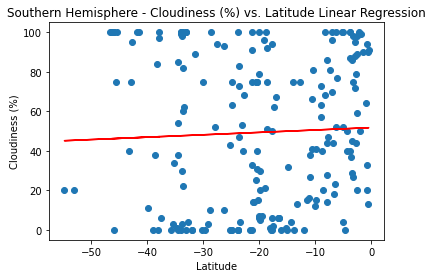

In [59]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 7.47
The r-squared is: 0.09303930315495469


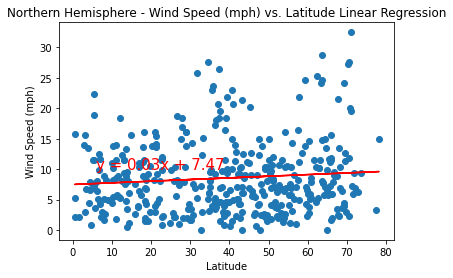

In [64]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 5.58
The r-squared is: -0.12571681622200417


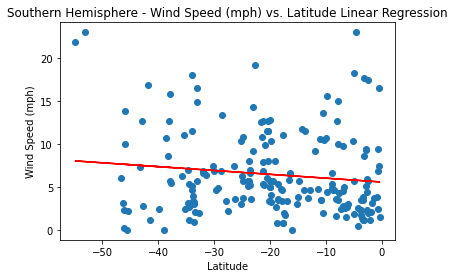

In [65]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()